In [26]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab.patches import cv_imshow
import cv2
from sklearn.model_selection import train_test_split
from skimage import img_as_float

In [32]:
# define paths
bmp_path = './drive/Shareddrives/MTech_MinorProject/BMP-new/BMP'
circle_path = bmp_path + '/circles_new'
bamboo_path = bmp_path + '/bamboo'
image_path = bmp_path + '/train_images_new'
true_image_path = bmp_path + '/true images_new'
raw_masks_path = f"{bmp_path}/raw_masks_new/"
raw_masks_summer_path = f"{bmp_path}/raw_masks_summer1/"
masks_path = f"{bmp_path}/masks_new/"

In [33]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


##Training data generation

In [4]:
len(os.listdir(bamboo_path))

101

In [5]:
import random

In [6]:
canvas_sz = 512
canvas = np.zeros((canvas_sz, canvas_sz))
canvas[:, :] = 255

#generation of masks

In [67]:
def get_mask(max_circles=60, circle_color=None, resize_sz=None):
  num_circles = random.randint(40, max_circles) # random num of circles
  canvas_sz = 512
  center = (int(canvas_sz/2), int(canvas_sz/2))
  canvas = np.zeros((canvas_sz, canvas_sz))
  canvas[:, :] = 255

  for i in range(1, num_circles):
    r = (15)*(i + (random.random() - 0.5)) # radius of circle
    r = int(r)
    # + random.randint(0, 10)
    axes_length = (r, r)
    angle = 20
    # Control how much of the  circle is drawn
    t = random.randint(0, 100)
    start_angle = random.randint(0, 200) 
    end_angle = start_angle + 200 + t
    # print(f"start: {start_angle} and end: {end_angle}")
    thickness = random.randint(1, 2) # random thickness# can vary
    clr = 80
    #  random.randint(120, 180)
    color = (clr, clr, clr) # random color
    if circle_color is not None:
      color = circle_color
    canvas = cv2.ellipse(canvas, center, axes_length, angle, start_angle, end_angle, color, thickness)

  if resize_sz is None:
    return canvas
  else:
    return cv2.resize(canvas, resize_sz)


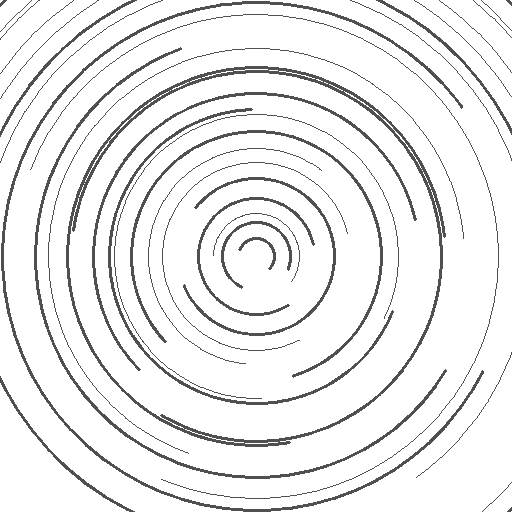

In [68]:
mask = get_mask(max_circles=115, resize_sz=(512, 512))
cv_imshow(mask)

In [69]:
num = len(os.listdir(raw_masks_summer_path)) + 1
for i in range(3):
  mask = get_mask(max_circles=110, resize_sz=(512, 512))
  cv2.imwrite(f"{raw_masks_summer_path}/mask_{num}.jpg", mask)
  num += 1

27
1


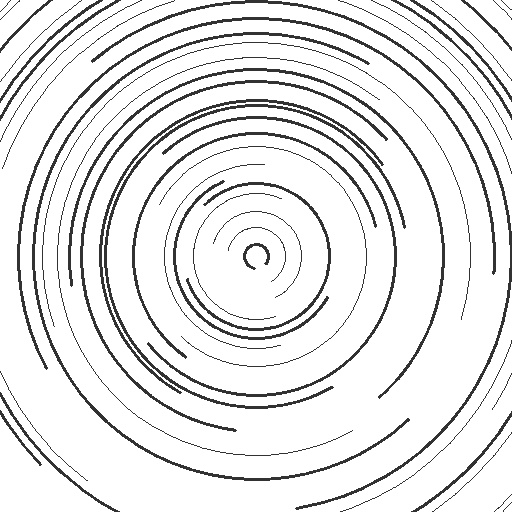

2


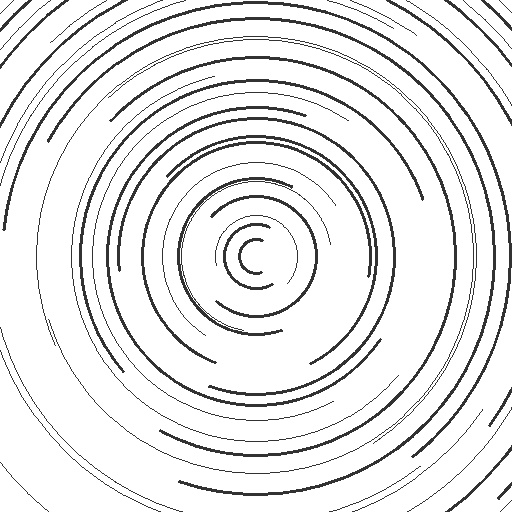

3


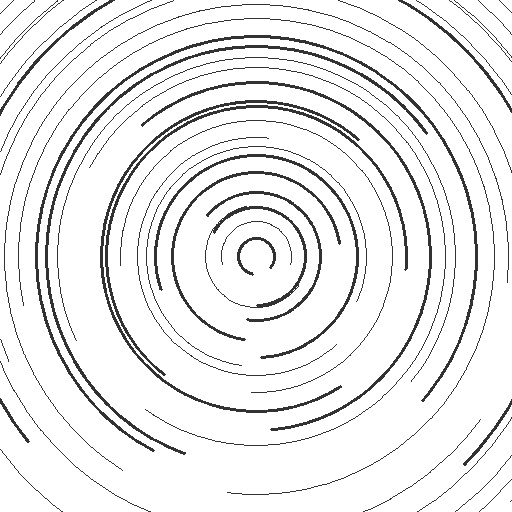

4


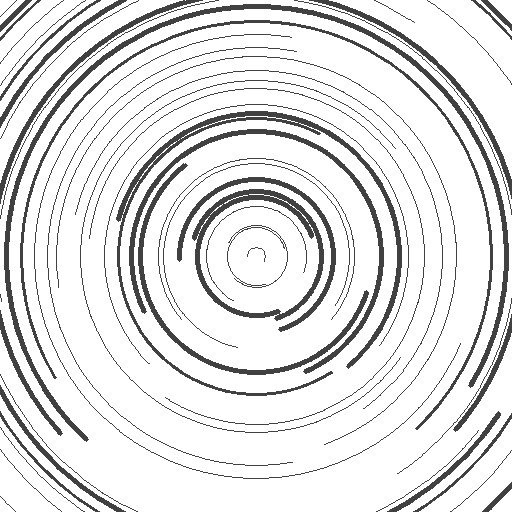

5


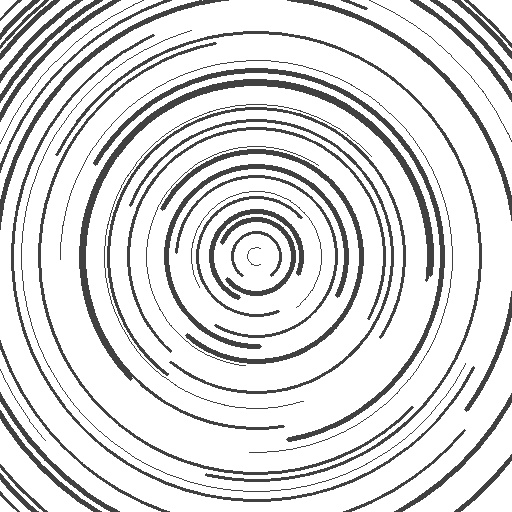

6


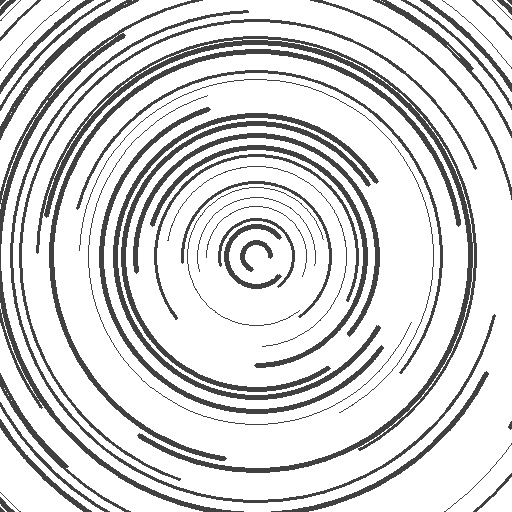

7


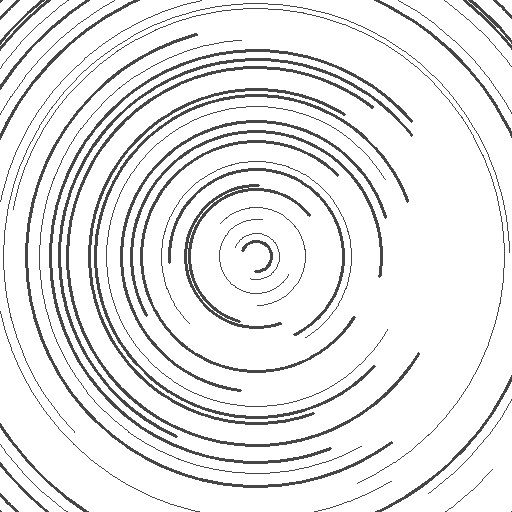

8


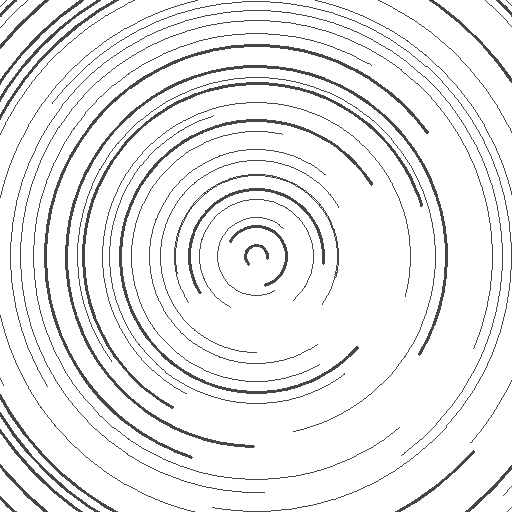

9


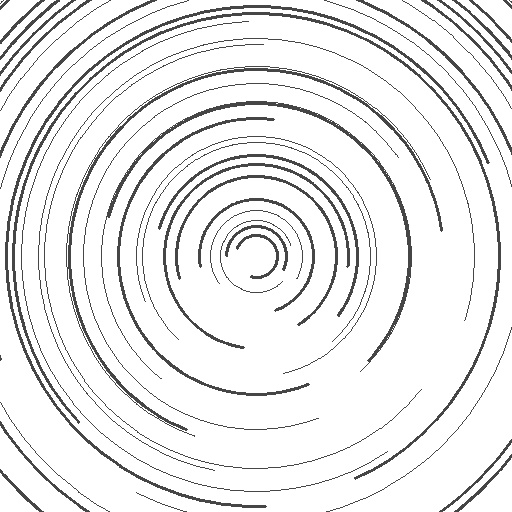

10


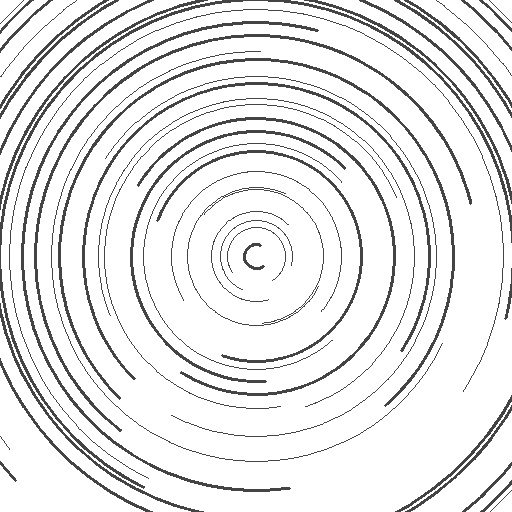

11


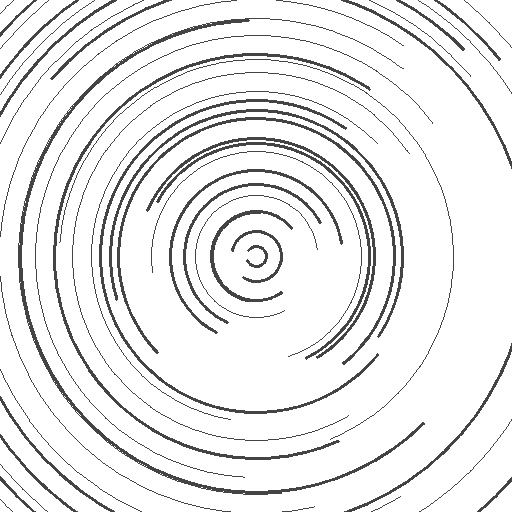

12


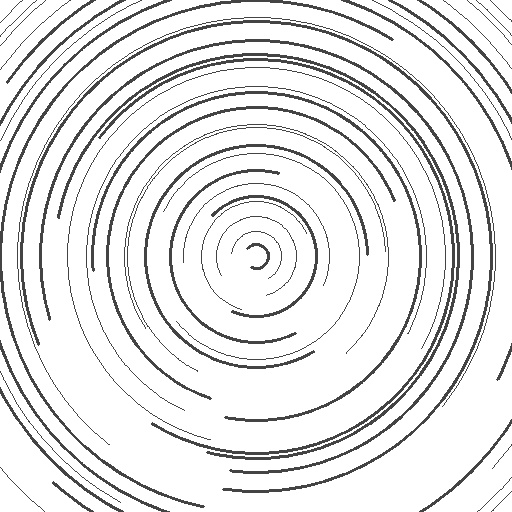

13


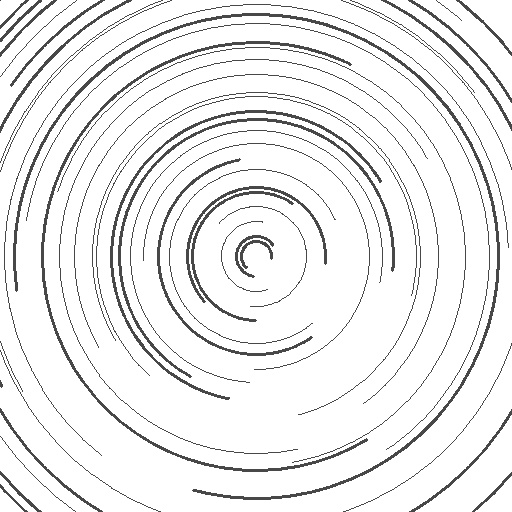

14


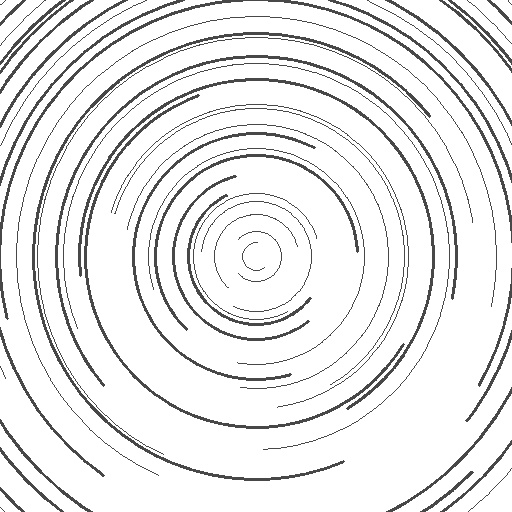

15


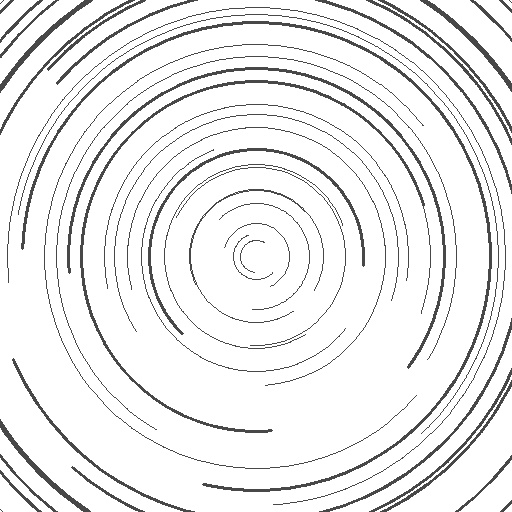

16


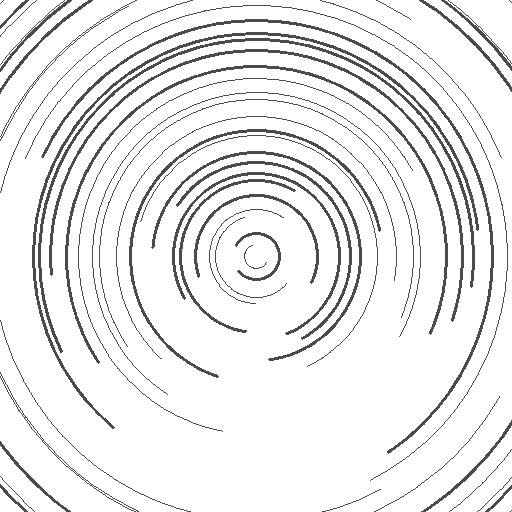

17


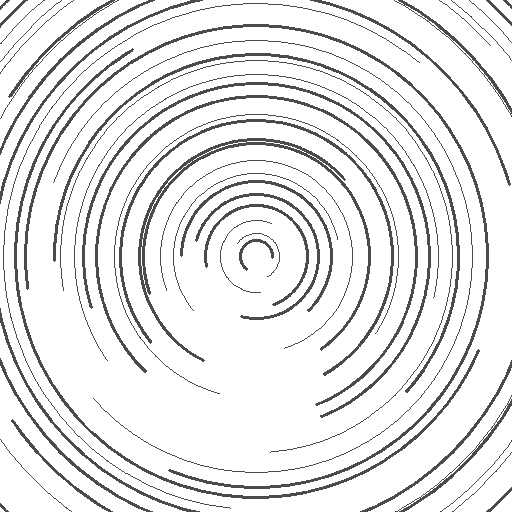

18


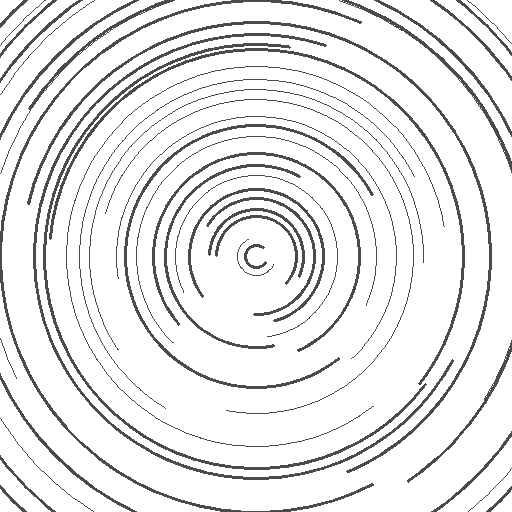

19


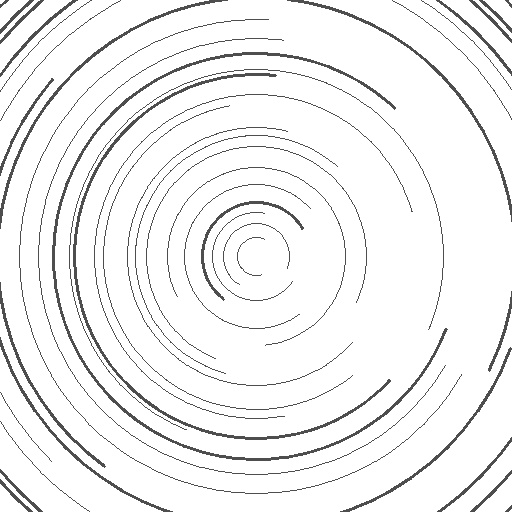

20


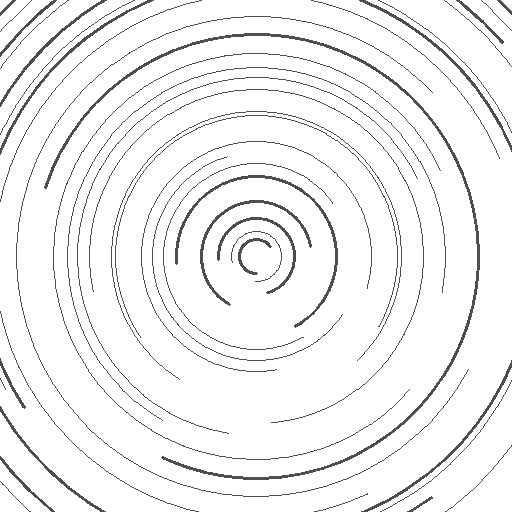

21


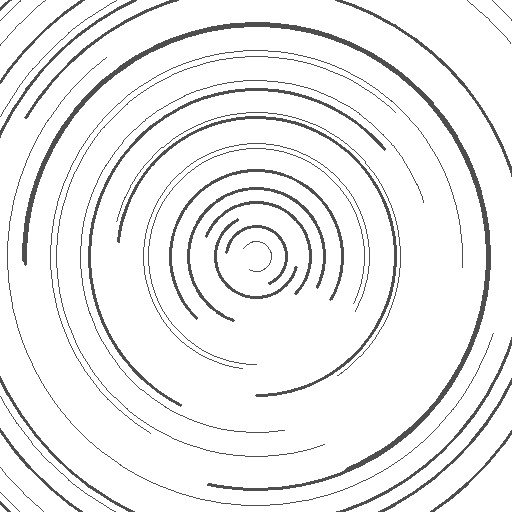

22


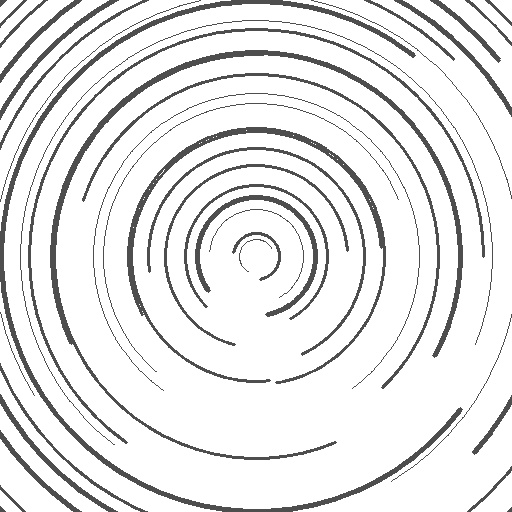

23


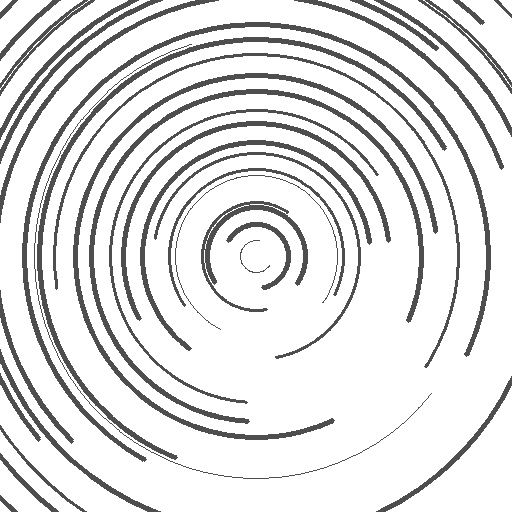

24


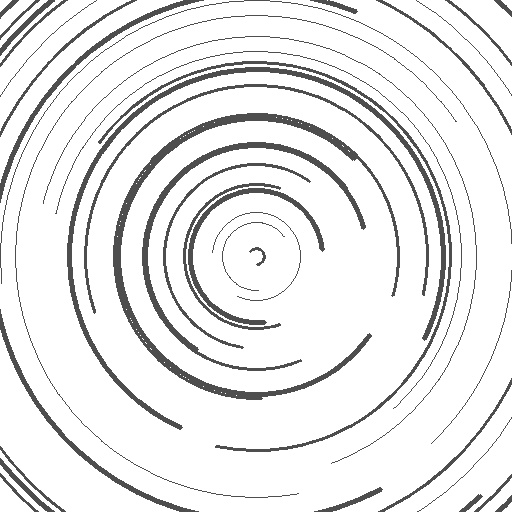

25


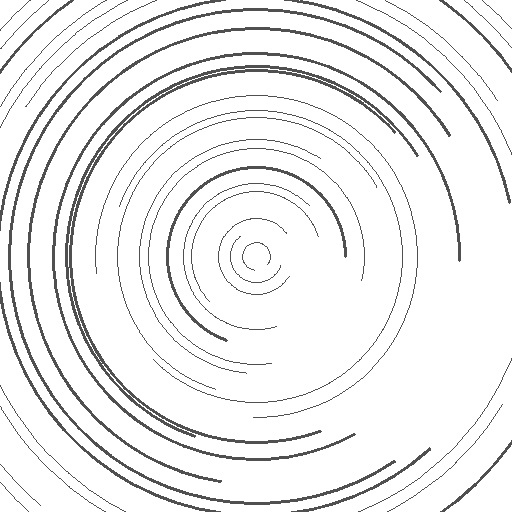

26


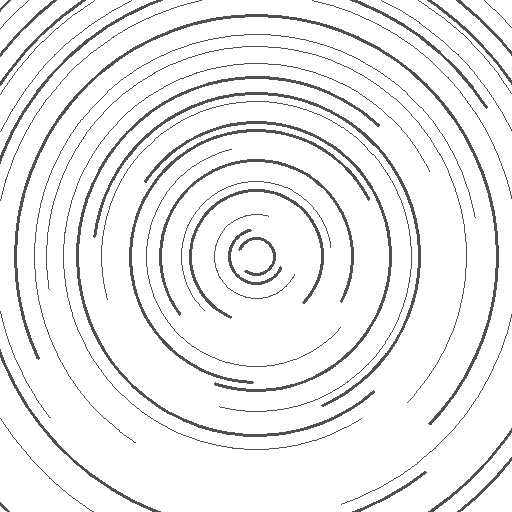

27


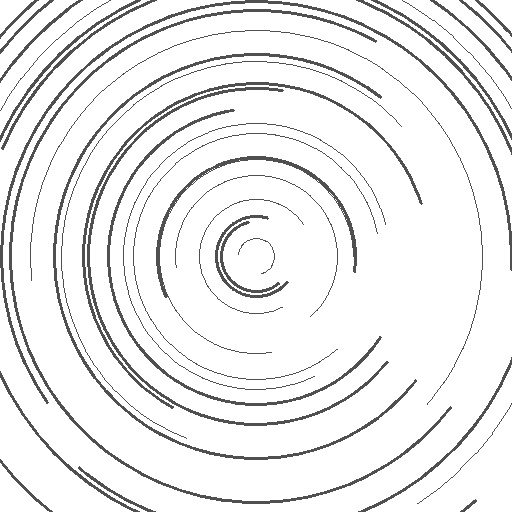

In [70]:
n = len(os.listdir(raw_masks_summer_path))
print(n)
mask_diff = np.zeros((n, n))
for i in range(1, n + 1):
  cur_img_path = f"{raw_masks_summer_path}/mask_{i}.jpg"
  cur_img = cv2.imread(cur_img_path, 0)
  print(i)
  cv_imshow(cur_img)


In [ ]:
from matplotlib import pyplot as plt


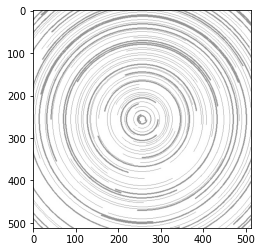

In [ ]:
path='/content/drive/Shareddrives/MTech_MinorProject/BMP-new/BMP/raw_masks_new/mask_1.jpg'
img = cv2.imread(path)
plt.imshow(img)
plt.show()